In [1]:
import numpy as np

In [7]:
test_input = """
6,10
0,14
9,10
0,3
10,4
4,11
6,0
6,12
4,1
0,13
10,12
3,4
3,0
8,4
1,10
2,14
8,10
9,0

fold along y=7
fold along x=5
"""


In [34]:
dots_txt, fold_txt = test_input.strip().split('\n\n')

def parse_positions(input_):
    pos = []
    for l in dots_txt.split():
        x, y = l.split(',')
        pos.append((int(x), int(y)))
    return np.array(pos)

dots = parse_positions(dots_txt)
dots

array([[ 6, 10],
       [ 0, 14],
       [ 9, 10],
       [ 0,  3],
       [10,  4],
       [ 4, 11],
       [ 6,  0],
       [ 6, 12],
       [ 4,  1],
       [ 0, 13],
       [10, 12],
       [ 3,  4],
       [ 3,  0],
       [ 8,  4],
       [ 1, 10],
       [ 2, 14],
       [ 8, 10],
       [ 9,  0]])

In [56]:
def parse_folds(fold_txt):
    folds = []
    for t in fold_txt.split('\n'):
        d, w = t[11:].split('=')
        folds.append((d, int(w)))
    return folds

folds = parse_folds(fold_txt)
folds

[('y', 7), ('x', 5)]

In [54]:
def pprint_sheet(sheet):
    for i in range(sheet.shape[0]):
        for j in range(sheet.shape[1]):
            if sheet[i,j] >= 1:
                print('#', end='')
            else:
                print('.', end='')
        print('\n')

sheet = np.zeros((dots.max(axis=0)[::-1] + 1), dtype=int)
sheet[dots[:,1], dots[:,0]] = 1
pprint_sheet(sheet)

...#..#..#.

....#......

...........

#..........

...#....#.#

...........

...........

...........

...........

...........

.#....#.##.

....#......

......#...#

#..........

#.#........



In [57]:
folds

[('y', 7), ('x', 5)]

In [66]:
f = folds[0]
s = sheet[:f[1], :] + sheet[f[1]+1:, :][::-1, :]
pprint_sheet(s)

#.##..#..#.

#...#......

......#...#

#...#......

.#.#..#.###

...........

...........



In [68]:
(s >= 1).sum()

17

In [76]:
with open('input.txt', 'r') as f:
    input_ = f.read()
    
dots_txt, fold_txt = input_.strip().split('\n\n')
dots = parse_positions(dots_txt)
folds = parse_folds(fold_txt)

sheet = np.zeros((dots.max(axis=0)[::-1] + 1), dtype=int)
sheet[dots[:,1], dots[:,0]] = 1

In [80]:
s = sheet.copy()
for f in folds:
    if f[0] == 'y':
        s = s[:f[1], :] + s[f[1]+1:, :][::-1, :]
    else:
        s = s[:, :f[1]] + s[:, f[1]+1:][:, ::-1]


In [81]:
(s >= 1).sum()

99

In [82]:
pprint_sheet(s)

.##..###..#..#...##.####.###...##...##..

#..#.#..#.#.#.....#.#....#..#.#..#.#..#.

#..#.###..##......#.###..###..#....#....

####.#..#.#.#.....#.#....#..#.#.##.#....

#..#.#..#.#.#..#..#.#....#..#.#..#.#..#.

#..#.###..#..#..##..#....###...###..##..



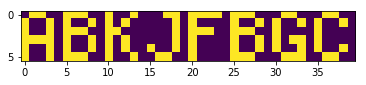

In [84]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(s >=1)